** 02805 Social graphs and interactions **

# Part 1: Network Models

## Watts-Strogatz Networks

** a) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1. **

In [31]:
import networkx as nx
import numpy as np
import pprint

N = 500 # Nodes
k = 4 # Average degree

# Increasing probability means a more random network
p1 = 0 # Probability 1
p2 = 0.1 # Probability 2
p3 = 1 # Probability 3

# watts_strogatz_graph(n, k, p, seed=None)
wsG1 = nx.watts_strogatz_graph(N, k, p1)
wsG2 = nx.watts_strogatz_graph(N, k, p2)
wsG3 = nx.watts_strogatz_graph(N, k, p2)

# Calculating the average shortest path length
d1 = nx.average_shortest_path_length(wsG1, weight=None)
d2 = nx.average_shortest_path_length(wsG2, weight=None)
d3 = nx.average_shortest_path_length(wsG3, weight=None)

print "Average shortest path length for graph 1:", d1
print "Average shortest path length for graph 2:", d2
print "Average shortest path length for graph 3:", d3

Average shortest path length for graph 1: 62.875751503
Average shortest path length for graph 2: 7.86008016032
Average shortest path length for graph 3: 7.4376993988


* The higher the probability the more it shortens the path lengths. When the rewiring probability is $p = 1$ the network is fully randomized.. As soon as the probability is at 100% the average path length does not decrease any further.

** b) Generate 50 networks with $N = 500$, $<k> = 4$, for each of $p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}$. Calculate the average of $<d>$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. **

In [32]:
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avgD = [[] for i in range(50)]
avg = []
sd = []

for i in range(0, len(p_list)):
    for j in range(0, 50):
        wsGraphs = nx.watts_strogatz_graph(N, k, p_list[i])
        avgD[i].append(nx.average_shortest_path_length(wsGraphs))
    
    avg.append(sum(avgD[i]) / float(len(avgD[i])))
    sd.append(np.std(avgD[i]))
    
    print "p:", p_list[i]
    print "Average path length:", avgD[i][0:4]
    print "Average of <d>:", avg[i]
    print "Standard deviation:", sd[i]
    print

p: 0
Average path length: [62.875751503006015, 62.875751503006015, 62.875751503006015, 62.875751503006015]
Average of <d>: 62.875751503
Standard deviation: 7.1054273576e-15

p: 0.01
Average path length: [24.12580360721443, 22.645715430861724, 21.20772745490982, 34.775815631262525]
Average of <d>: 24.4305813226
Standard deviation: 4.70637358988

p: 0.03
Average path length: [11.547230460921844, 13.59240881763527, 16.213675350701404, 13.271190380761523]
Average of <d>: 13.3129734669
Standard deviation: 1.30866268344

p: 0.05
Average path length: [10.697859719438878, 9.77112625250501, 10.208384769539078, 10.563118236472945]
Average of <d>: 10.1493963928
Standard deviation: 0.574019526373

p: 0.1
Average path length: [7.994525050100201, 8.038404809619239, 7.639655310621243, 7.802957915831663]
Average of <d>: 7.73917563126
Standard deviation: 0.2874682473

p: 0.2
Average path length: [6.12464128256513, 6.065330661322645, 6.232464929859719, 5.93802004008016]
Average of <d>: 6.09402308617
Sta

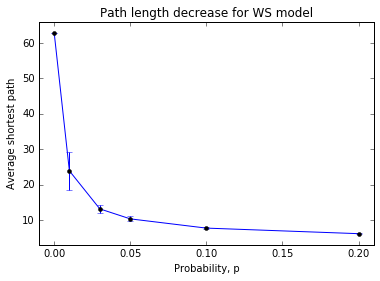

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

x = p_list
y = avg
errorBar = sd

# Plot
plt.errorbar(x, y, yerr = errorBar, marker='o', markersize=4, mfc='black')
plt.axis([min(x)-(max(x)*0.05), max(x)+(max(x)*0.05), min(y)-(max(y)*0.05), max(y)+(max(y)*0.05)])
plt.title("Path length decrease for WS model")
plt.xlabel("Probability, p")
plt.ylabel("Average shortest path")
plt.show()

## The Barabasi-Albert Model

** a) Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX. **

Number of nodes: 100
Number of edges: 99


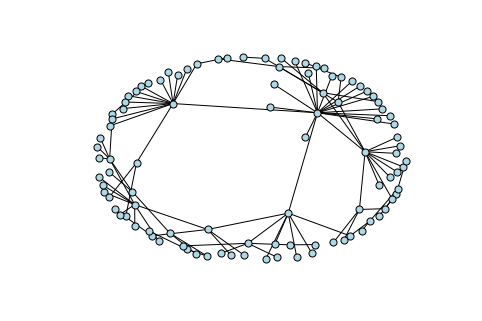

In [235]:
%reset -f
import networkx as nx
import numpy as np
import pprint
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph();
nodes = [0,1]
G.add_nodes_from(nodes)
G.add_edge(0,1)

# create 100 node network
for node in xrange(2, 100):
    # Add another node
    G.add_node(node)
    # Connect to one of the existing nodes, choose randomly
    con_n = rand.choice(nodes)
    # Add edge
    G.add_edge(node, con_n)
    
    # Extend list of all nodes with node pair
    # Is proportional to its connections
    nodes.extend((node, con_n))

# Plot
nx.draw_spring(G, node_size=50, node_color='lightblue')

print "Number of nodes:", len(G.nodes())
print "Number of edges:", len(G.edges())

** b) Now create a 5000 node network. **

In [236]:
# N = 5000
for add_node in range(100, 5000):
    # Random node to connect to
    con_n = rand.choice(nodes)
    
    # Add node & edge
    G.add_node(add_node)
    G.add_edge(add_node, con_n)
    nodes.extend((add_node, con_n))

print "Number of nodes:", len(G.nodes())
print "Number of edges:", len(G.edges())

Number of nodes: 5000
Number of edges: 4999


** c) What's the maximum and minimum degree? **

In [237]:
# Degree
degree = nx.degree(G).values()
print "Maximum degree:", max(degree)
print "Minimum degree:", min(degree)

Maximum degree: 163
Minimum degree: 1


** d) Now, bin the degree distribution, for example using numpy.histogram. **

In [238]:
bins = range(min(degree), max(degree) + 1) 
hist, bin_edges = np.histogram(degree, bins = bins)

** e) Plot the distribution. Plot it with both linear and log-log axes. **

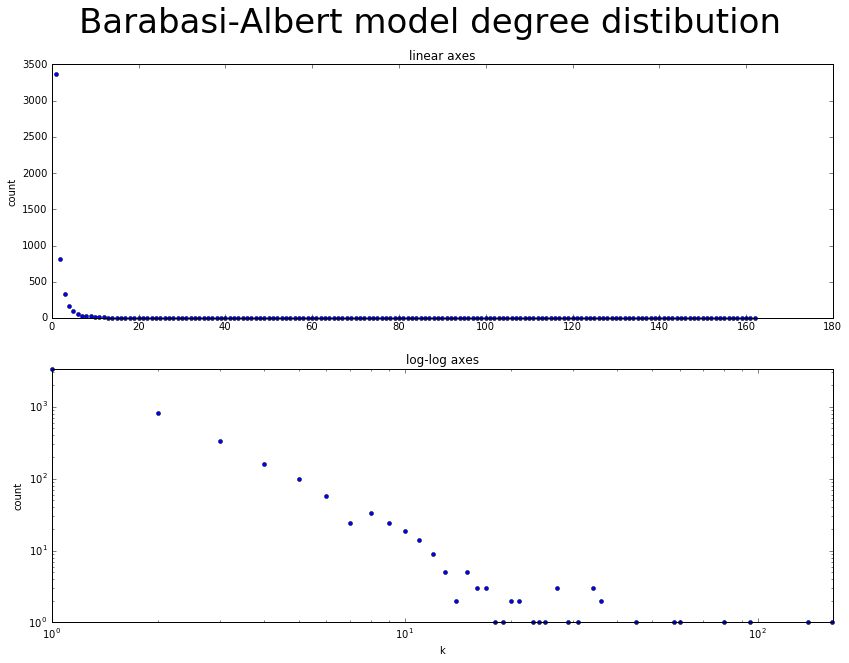

In [239]:
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Barabasi-Albert model degree distibution', fontsize=34)

# plot binned data
plt.subplot('211')
plt.plot(bin_edges[:-1], hist, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("linear axes")

plt.subplot('212')
plt.loglog(bin_edges[:-1], hist, 'ro', color='blue', markersize=4, clip_on=False)
plt.title("log-log axes")
plt.axis([min(bin_edges), max(bin_edges), min(hist), max(hist)])
plt.xlabel("k")
plt.ylabel("count")
plt.show()

## Power-laws and the friendship paradox

** a) Pick a node i at random (e.g. use random.choice). Find its degree. **

In [240]:
i = rand.choice(G.nodes())
iDegree = G.degree(i)

print "Random node i:", i
print "Degree:", iDegree

Random node i: 23
Degree: 9


** b) Find i's neighbors. And calculate their average degree. **

In [241]:
from __future__ import division

def get_average_degree(graph, nodes=None, print_edges=False):
    if not nodes:
        nodes = graph.nodes()
    deg_graph = graph.degree(nbunch=nodes)
    sum_of_edges = sum(deg_graph.values())
    deg = sum_of_edges/len(nodes)
    if print_edges:
        return deg, deg_graph.values()
    return deg

In [242]:
iNeighbors = G.neighbors(i)
i_neighs_avg_deg = get_average_degree(G, iNeighbors, print_edges=False)

print "Random node i:", i
print "Degree:", iDegree
print "Neighbors:", iNeighbors
print
print "Average degree of neighbors:", i_neighs_avg_deg

Random node i: 23
Degree: 9
Neighbors: [866, 4698, 1226, 204, 13, 1940, 90, 28, 698]

Average degree of neighbors: 3.22222222222


** c) Compare the two numbers to check if it's true that i's friends (on average) have more friends than i. **

In [ ]:
????

** d) Do this 1000 times. How many out of those 1000 times is the friendship paradox true? **

In [243]:
count = 0

for j in range(1000):
    i = rand.choice(G.nodes())
    iDegree = G.degree(i)
    iNeighbors = G.neighbors(i) 
    fpDegree = sum(G.degree(iNeighbors).values()) / float(len(iNeighbors))
    
    if fpDegree > iDegree:
        count += 1
        
print "Counts of true:", count, " / 1000"

Counts of true: 864  / 1000


## Growth without preferential attachment

** Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Compare the network you've just built to the ER network of same size and same p. What are the differences? Explain in your own words. **

In [245]:
N = G.number_of_nodes()
k = get_average_degree(G)

# Barabási-Albert is preferential attachment model
# http://networkx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph
BA = nx.barabasi_albert_graph(N, int(round(k)))

# Erdős-Rényi without preferential attachment
# http://networkx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph
p = k/(N-1)
ER = nx.erdos_renyi_graph(N, p)

# Get degree distribution
deg_seq_BA = sorted(nx.degree(BA).values(), reverse=True)
d_min_BA = min(deg_seq_BA)
d_max_BA = max(deg_seq_BA)
print "Maximum degree - BA:", d_max_BA
print "Minimum degree - BA:", d_min_BA
print

deg_seq_ER = sorted(nx.degree(ER).values(), reverse=True)
d_min_ER = min(deg_seq_ER)
d_max_ER = max(deg_seq_ER)
print "Maximum degree - ER:", d_max_ER
print "Minimum degree - ER:", d_min_ER

Maximum degree - BA: 178
Minimum degree - BA: 2

Maximum degree - ER: 8
Minimum degree - ER: 0


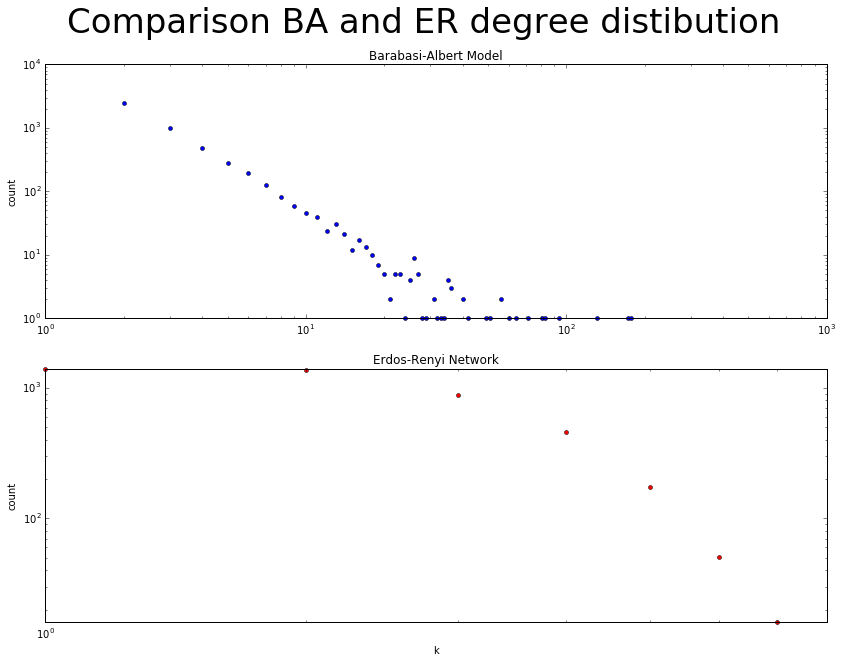

In [246]:
# Look at degree distribution
bins_BA = xrange(d_min_BA, d_max_BA+1) 
hist_BA, bin_edg_BA = np.histogram(deg_seq_BA, bins=bins_BA)

bins_ER = xrange(d_min_ER, d_max_ER+1) 
hist_ER, bin_edg_ER = np.histogram(deg_seq_ER, bins=bins_ER)

fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Comparison BA and ER degree distibution', fontsize=34)

# Plot binned data
plt.subplot('211')
plt.loglog(bin_edg_BA[:-1], hist_BA, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("Barabasi-Albert Model")

plt.subplot('212')
plt.loglog(bin_edg_ER[:-1], hist_ER, 'ro', color='red', markersize=4, clip_on=False)
plt.axis([min(bin_edg_ER), max(bin_edg_ER), min(hist_ER), max(hist_ER)])
plt.title("Erdos-Renyi Network")
plt.xlabel("k")
plt.ylabel("count")
plt.show()

In [247]:
# Number of connected components
sub_G = sorted(nx.connected_component_subgraphs(BA), key=len, reverse=True)
sub_ER = sorted(nx.connected_component_subgraphs(ER), key=len, reverse=True)

gcc_G = sub_G[0]
gcc_ER = sub_ER[0]

num_G = sum(x.size() > 0 for x in sub_G)
num_ER = sum(x.size() > 0 for x in sub_ER)

print 'Size of giant connected component - BA:', gcc_G.size()
print 'Size of giant connected component - ER:', gcc_ER.size()
print
print 'Number of connected components - BA:', num_G
print 'Number of connected components - ER:', num_ER

Size of giant connected component - BA: 9996
Size of giant connected component - ER: 4732

Number of connected components - BA: 1
Number of connected components - ER: 150


* The network generated by the growth mechanism without preferential attachment (ER) has a similar degree distribution to the random network. On the other hand the BA graph has only one giant component since each vertex has to make a link with the existing graph which is evolved from a minimal graph that has two vertices.

# Part 2: The Wikipedia Philosopher's network

## Basic stats

** a) How many philosophers in each list? How many total? **

In [65]:
%reset -f

import io
import re

# Open file
path = "../Python/Week4/"
fileAes = io.open(path + 'wikiAestheticians.txt', 'r')
fileEpi = io.open(path + 'wikiEpistemologists.txt', 'r')
fileEth = io.open(path + 'wikiEthicists.txt', 'r')
fileLog = io.open(path + 'wikiLogicians.txt', 'r', encoding='utf-8')
fileMeta = io.open(path + 'wikiMetaphysicians.txt', 'r')
fileSoc = io.open(path + 'wikiSocialAndPoliticalPhilosophers.txt', 'r')

#getAes = re.findall(r'\*\[\[(.*?)\]\]', fileAes.read())
#getEpi = re.findall(r'\*\[\[(.*?)\]\]', fileEpi.read())
#getEth = re.findall(r'\*\[\[(.*?)\]\]', fileEth.read())
#getLog = re.findall(r'\* \[\[(.*?)\]\]', fileLog.read())
#getMeta = re.findall(r'\* \[\[(.*?)\]\]', fileMeta.read())
#getSoc = re.findall(r'\*\[\[(.*?)\]\]', fileSoc.read())

reAes = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileAes.read(), re.UNICODE)
reEpi = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileEpi.read(), re.UNICODE)
reEth = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileEth.read(), re.UNICODE)
reLog = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileLog.read(), re.UNICODE)
reMeta = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileMeta.read(), re.UNICODE)
reSoc = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-]+)([\w\s\.|()-,]*)(\]\])', fileSoc.read(), re.UNICODE)

# Loop through to get the third group
getAes = []
getEpi = []
getEth = []
getLog = []
getMeta = []
getSoc = []

[getAes.append(reAes[i][2]) for i in range(len(reAes))]
[getEpi.append(reEpi[i][2]) for i in range(len(reEpi))]
[getEth.append(reEth[i][2]) for i in range(len(reEth))]
[getLog.append(reLog[i][2]) for i in range(len(reLog))]
[getMeta.append(reMeta[i][2]) for i in range(len(reMeta))]
[getSoc.append(reSoc[i][2]) for i in range(len(reSoc))]

getAll = getAes + getEpi + getEth + getLog + getMeta + getSoc
getAllUnique = list(set(getAes + getEpi + getEth + getLog + getMeta + getSoc))

totalAes = len(getAes)
totalEpi = len(getEpi)
totalEth = len(getEth)
totalLog = len(getLog)
totalMeta = len(getMeta)
totalSoc = len(getSoc)
totalAll = len(getAll)
  
print "Total Aestheticians:", totalAes
print "Total Epistemologists:", totalEpi
print "Total Ethicists:", totalEth
print "Total Logicians:", totalLog
print "Total Metaphysicians:", totalMeta
print "Total Social and political philosophers:", totalSoc

print "\nTotal philosophers:", len(getAll)
print "Total unique philosophers:", len(getAllUnique)

Total Aestheticians: 126
Total Epistemologists: 99
Total Ethicists: 272
Total Logicians: 270
Total Metaphysicians: 96
Total Social and political philosophers: 297

Total philosophers: 1160
Total unique philosophers: 1013


** b) Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages) **

In [66]:
print "\nLargest branch:", max(totalAes, totalEpi,totalEth, totalLog, totalMeta, totalSoc)


Largest branch: 297


* The Social and Political branch is the largest with 297 philosophers.

** c) Which philosopher is in most lists & and how many? **

In [67]:
from collections import Counter
getOccurances = sorted(Counter(getAll).items(), key=lambda pair: pair[1], reverse=True)

print getOccurances[0:5]

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]


* Aristitle and Thomas Aquinas share the first place, as both are represented in all 6 lists.

** d) Create a list of every philosopher that occurs in more than one list. **

In [68]:
multiOccurances = []

for i in range(len(getOccurances)):
    if getOccurances[i][1] > 1:
        multiOccurances.append(getOccurances[i])
        #print multiOccurances[i]
print multiOccurances[0:5]

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]


** e) Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list). **

The above list is already sorted.

** f) Print the top 5 guys and their list counts. Have you heard of any of them?  **

In [69]:
for i in range(5):
    print multiOccurances[i][0], "- [", multiOccurances[i][1], "]"

Thomas Aquinas - [ 6 ]
Aristotle - [ 6 ]
Plato - [ 5 ]
Bertrand Russell - [ 5 ]
Immanuel Kant - [ 5 ]


All five philosophers are fairly influential. Their work, theories and isms have had an impact on history to this day. Most if not all of these names are a part of the curriculum in the danish school system, meaning that most should have heard of these philosophers. *#TeamImmanuelKant*

## Degree distribution

** a) Why do you think we want to use a directed graph? Could have we used an undirected graph instead? **
* Depends on the usage and the actual data. If the goal is to look at any given relationship between the philosophers, then an undirected graph will suffice.
* However, if the goal is to look at who was influenced by whom, then directed graphs are necessary.
* An example is the relationship between Plato and Aristotle. Aristotle was largely influenced by Plato (he was his student), which would indicate a one-way (directional) path between the two.
* One caveat is the actual data, however. As the Wikipedia page will mention that Aristotle is Plato's student on Platos page, and that Plato was Aristotles teacher on Aristotle's page, this data/method is not sufficient to represent this relationship.

** b) What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree? **

In [73]:
import networkx as nx
import codecs

G = nx.DiGraph();
G.add_nodes_from(getAllUnique)

# Check if a philosopher is linked to through all files and links

# First loop for all philosophers
for i in range(len(getAllUnique)):
    # Substitute spaces with \s for search
    formatSpace = re.sub(r'\s', r'\s', getAllUnique[i])

    # Second loop for all files
    for j in range(len(getAllUnique)):    
        # Substitute spaces with underscore for file name
        formatName = re.sub(r'\s', r'_', getAllUnique[j]).encode('utf-8')
        
        # Open file and get all links
        getFile = codecs.open(path + 'philosophers/' + formatName + '.txt', 'r', encoding='utf-8')
        getLinks = re.findall(r'\[\[(.*?)\]\]', getFile.read())

        # Third loop for all links in files
        for links in getLinks:
            # Get all instances where name is in link
            getAnd = re.search(r'' + getAllUnique[i], links)
            if getAnd:
                G.add_edge(getAllUnique[i], getAllUnique[j])
                #print getAllUnique[i] + " is linked to " + getAllUnique[j]
                #print

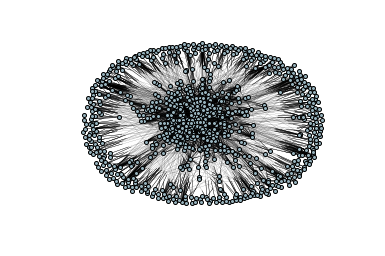

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=16, width=0.1, node_color="#99B5BF")
plt.axis('off')
plt.show()

In [75]:
import numpy as np

print "Total nodes:", len(G.nodes())
print "Total links:", len(G.edges())
print "Average degree:", sum(G.degree().values()) / float(len(G.degree().values()))
print "Median degree:", np.median(G.degree().values())

Total nodes: 1013
Total links: 5114
Average degree: 10.0967423495
Median degree: 5.0


** c) List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before? **

In [83]:
print "Top 10 in-degree:\n", sorted(G.in_degree_iter(), reverse=True)[0:5]
print
print "Top 10 out-degree:\n", sorted(G.out_degree_iter(), reverse=False)[0:5]

Top 10 in-degree:
[(u'\xdeorsteinn Gylfason', 11), (u'\xc9tienne de La Bo\xe9tie', 3), (u'list of political scientists', 13), (u'list of philosophers', 0), (u'list of ethics topics', 0)]

Top 10 out-degree:
[(u'A. J. Ayer', 12), (u'Abraham Fraenkel', 6), (u'Abraham Joshua Heschel', 3), (u'Abraham Robinson', 4), (u'Abraham ibn Daud', 0)]


** d) Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree? **

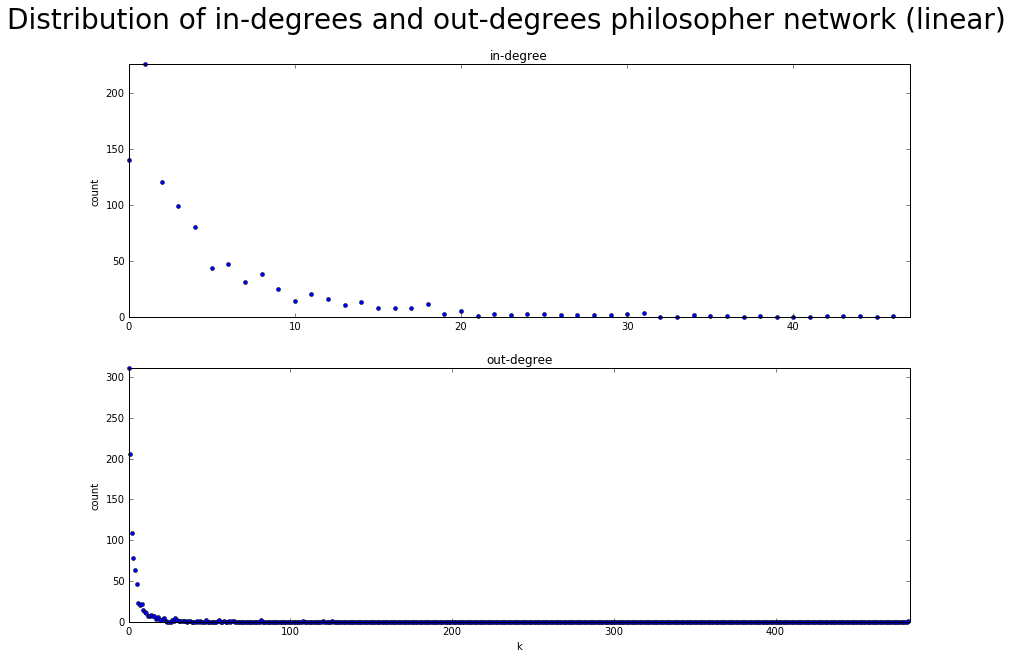

Most common in-degree: 3.0
Most common out-degree: 1.0


In [84]:
deg_sequence_in = sorted(G.in_degree().values(), reverse=True)
dmax_in = max(deg_sequence_in)
dmin_in = min(deg_sequence_in)

deg_sequence_out = sorted(G.out_degree().values(), reverse=True)
dmax_out = max(deg_sequence_out)
dmin_out = min(deg_sequence_out)

# set figure
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Distribution of in-degrees and out-degrees philosopher network (linear)', fontsize=28)

# generate histograms
p_bin_in = xrange(dmin_in, dmax_in+1)
hist_in, bin_edg_in = np.histogram(deg_sequence_in, bins=p_bin_in)

p_bin_out = xrange(dmin_out, dmax_out+1)
hist_out, bin_edg_out = np.histogram(deg_sequence_out, bins=p_bin_out)

# set histogram data and dimension
plt.subplot('211')
plt.plot(bin_edg_in[:-1], hist_in, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_in), max(bin_edg_in), min(hist_in), max(hist_in)])

plt.ylabel("count")
plt.title("in-degree")

plt.subplot('212')
plt.plot(bin_edg_out[:-1], hist_out, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_out), max(bin_edg_out), min(hist_out), max(hist_out)])
plt.xlabel('k')
plt.ylabel('count')
plt.title("out-degree")
plt.show()

print "Most common in-degree:", np.median(np.array(deg_sequence_in))
print "Most common out-degree:", np.median(np.array(deg_sequence_out))

** e) Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale. **

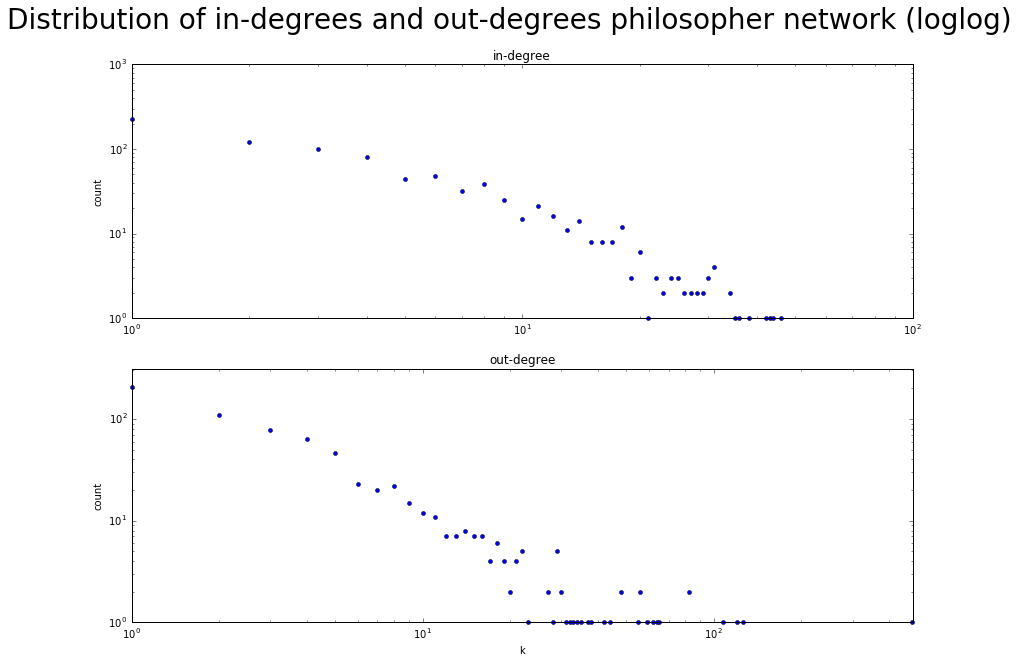

In [85]:
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Distribution of in-degrees and out-degrees philosopher network (loglog)', fontsize=28)

plt.subplot('211')
plt.loglog(bin_edg_in[:-1], hist_in, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("in-degree")

plt.subplot('212')
plt.loglog(bin_edg_out[:-1], hist_out, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_out), max(bin_edg_out), min(hist_out), max(hist_out)])
plt.xlabel('k')
plt.ylabel('count')
plt.title("out-degree")
plt.show()

** f) Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? **

* The in-degree distribution in the philosophers network follows the power-law. A popular philosopher gets much more attention. The incoming links follow preferential attachment.

* The out-degree distribution follows something between power-law and poisson, because a document cannot be infinitely long and thus have innumerable out-degree links.

** g) Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out? **

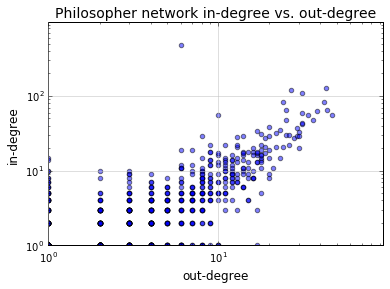

Correlation coefficient is: 0.421936520121


In [86]:
in_deg_val = G.in_degree().values()
out_deg_val = G.out_degree().values()

fig, ax = plt.subplots()

ax.set_title("Philosopher network in-degree vs. out-degree", fontsize=14)
ax.set_xlabel("out-degree", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_xlim([1, max(in_deg_val) * 2])
ax.set_ylim([1, max(out_deg_val) * 2])
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(in_deg_val, out_deg_val, alpha=0.5)

plt.show()

print 'Correlation coefficient is: {0}'.format(np.corrcoef(x=out_deg_val, y=in_deg_val)[0,1])